<a href="https://colab.research.google.com/github/linconsarker/machine-learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# 2️⃣ Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# 3️⃣ Split features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 4️⃣ Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)

Intercept: -37.02327770606409


In [15]:
coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=["Coefficient"])
coeff_df

,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


In [16]:
# 5️⃣ Make Predictions and Evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.5757877060324508
RMSE: 0.7455813830127764


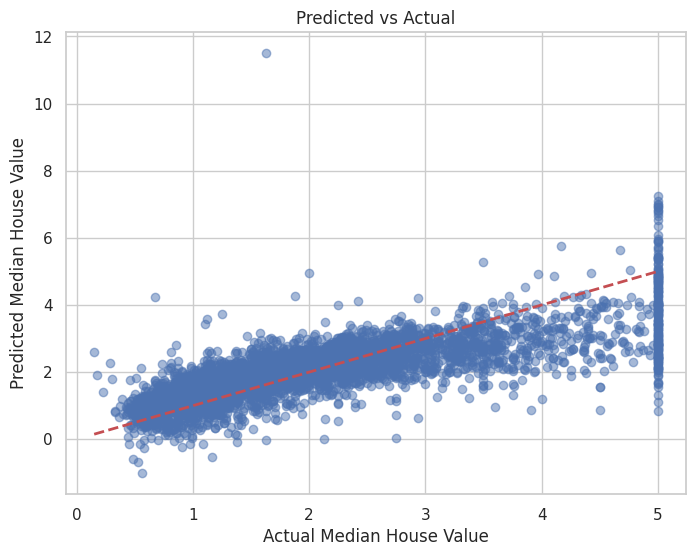

In [17]:
# 6️⃣ Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual")
plt.show()


In [18]:
# 7️⃣ Sample Prediction
sample = X_test.sample(1, random_state=1)
pred_val = model.predict(sample)[0]
print("Sample features:\n", sample)
print("Predicted Median House Value:", pred_val)


Sample features:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4309   1.676      44.0  3.672176   1.143251      2297.0  3.163912     34.09   

      Longitude  
4309    -118.32  
Predicted Median House Value: 1.5888280489837285
